In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [9]:
!PWD

/Users/jeremypalmerio/Repos/CasualPresentation


In [10]:
fname = 'LUCAS/LUCAS.csv'
df = pd.read_csv(fname, sep=',')

# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Smoking             2000 non-null   int64
 1   Yellow_Fingers      2000 non-null   int64
 2   Anxiety             2000 non-null   int64
 3   Peer_Pressure       2000 non-null   int64
 4   Genetics            2000 non-null   int64
 5   Attention_Disorder  2000 non-null   int64
 6   Born_an_Even_Day    2000 non-null   int64
 7   Car_Accident        2000 non-null   int64
 8   Fatigue             2000 non-null   int64
 9   Allergy             2000 non-null   int64
 10  Coughing            2000 non-null   int64
 11  Lung_cancer         2000 non-null   int64
dtypes: int64(12)
memory usage: 187.6 KB


In [12]:
df.describe()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.752500,0.782000,0.63050,0.341500,0.139500,0.32250,0.489500,0.723000,0.737000,0.34300,0.700500,0.721500
std,0.431668,0.412991,0.48279,0.474331,0.346554,0.46755,0.500015,0.447628,0.440373,0.47483,0.458154,0.448373
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df[df['Anxiety'] == 1].describe()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
count,1261.000000,1261.000000,1261.0,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,0.885012,0.879461,1.0,0.342585,0.141158,0.317209,0.475020,0.733545,0.754163,0.349722,0.748612,0.786677
std,0.319134,0.325720,0.0,0.474762,0.348322,0.465574,0.499574,0.442280,0.430753,0.477071,0.433983,0.409816
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

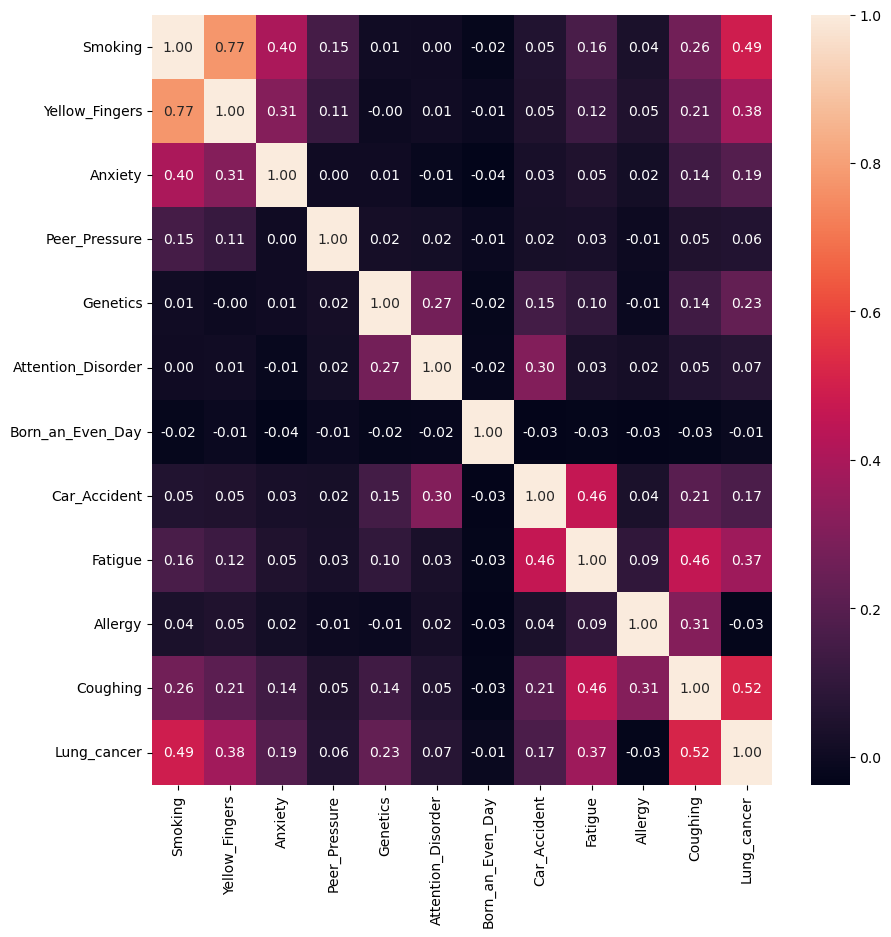

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)

### Making the Graph 


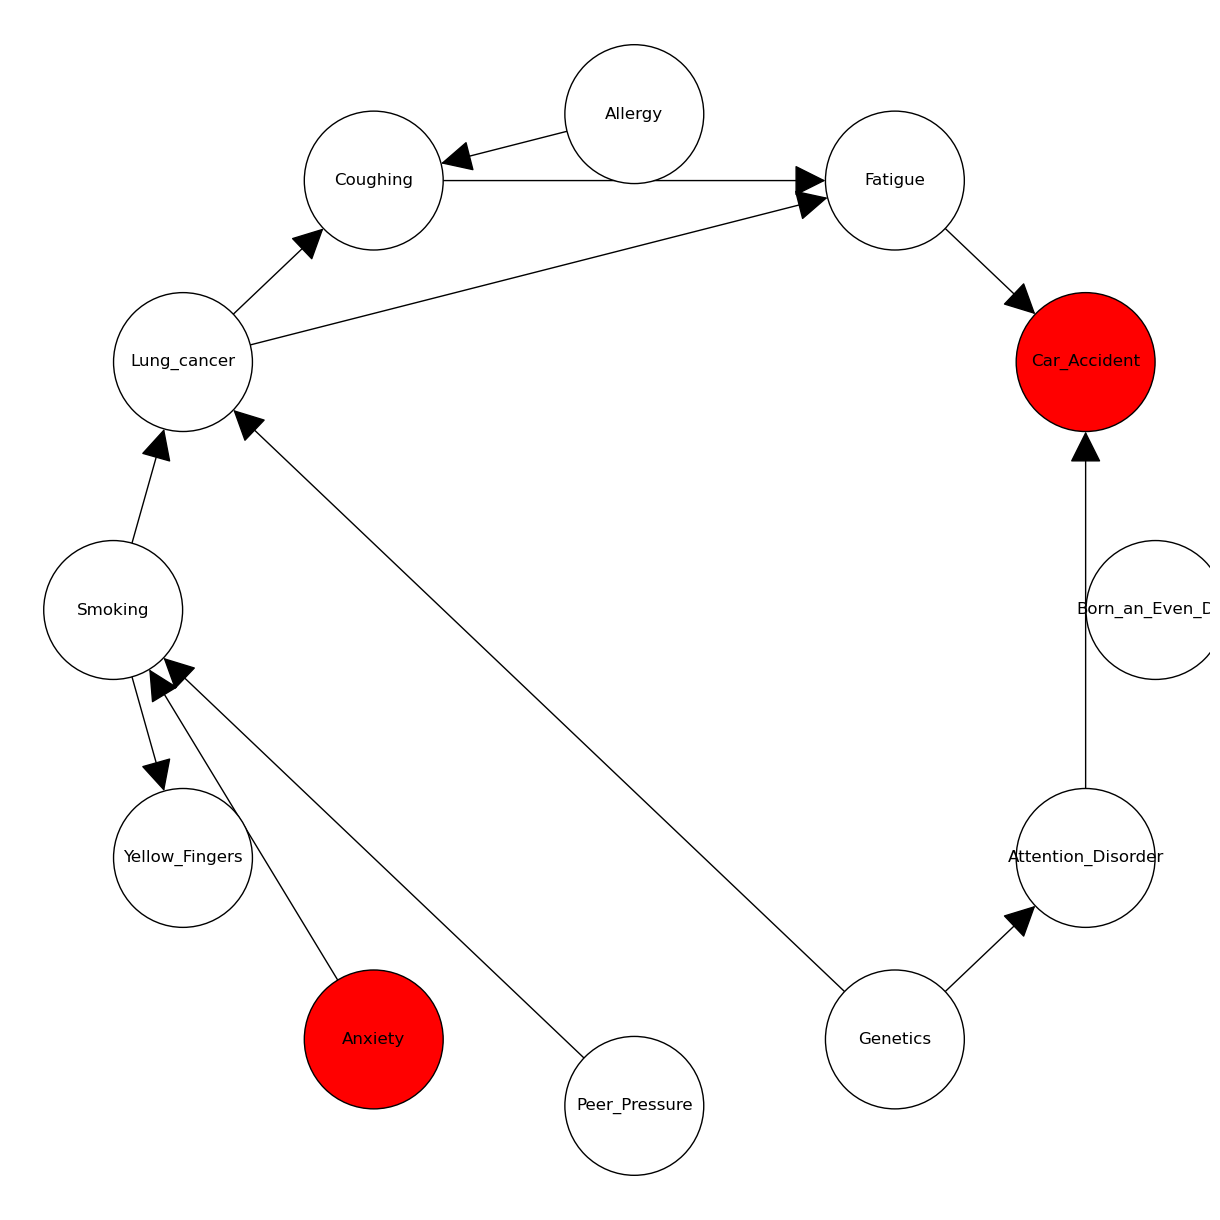

In [15]:
G = nx.DiGraph()
G.add_nodes_from(df.columns)
G.add_edges_from([('Anxiety', 'Smoking'),
                   ('Peer_Pressure', 'Smoking'),
                   ('Smoking', 'Yellow_Fingers'),
                   ('Smoking', 'Lung_cancer'),
                   ('Genetics', 'Lung_cancer'),
                   ('Genetics', 'Attention_Disorder'),
                   ('Lung_cancer', 'Fatigue'),
                   ('Lung_cancer', 'Coughing'),
                   ('Allergy', 'Coughing'),
                   ('Coughing', 'Fatigue'),
                   ('Attention_Disorder', 'Car_Accident'),
                   ('Fatigue', 'Car_Accident'),

                     ])
plt.figure(figsize=(12,12))

nx.draw_shell(G, with_labels=True, node_color = ['w', 'w', 'r', 'w', 'w', 'w', 'w', 'r', 'w', 'w', 'w', 'w'], arrowsize = 50, node_size = 10000, edgecolors='black', font_size=12)

In [16]:
nx.write_gml(G, 'LUCAS.gml')

## Estimands

In [17]:
from dowhy.causal_identifier import backdoor
from dowhy import CausalModel

In [18]:
# a utility function to parse the .gml file to string 
# From tutorial 3
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

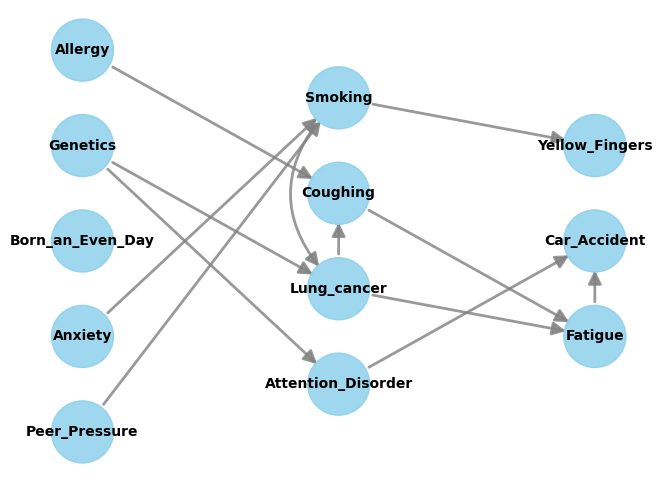

In [19]:
graph_str = gml_to_string('LUCAS.gml')

model=CausalModel(
    data = df,
    treatment='Anxiety',
    outcome='Car_Accident',
    graph=graph_str
)
model.view_model()

In [20]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡            d                                ∂                               ↪
E⎢──────────────────────────(Car_Accident)⋅──────────([Yellow_Fingers  Smoking ↪
 ⎣d[Yellow_Fingers  Smoking]               ∂[Anxiety]                          ↪

↪   ⎤
↪ ])⎥
↪   ⎦
Estimand assumption 1, Full-mediation: Yellow_Fingers,Smoking intercepts (blocks) all directed paths from Anxiety to C,a,r,_,A,c,c,i,d,e,n,t.
Estimand assumption 2, First-stage-unconfoundedness: If U→{Anxiety} and U→{Yellow_Fingers,Smoking} then P(Yellow_Fingers,Smoking|Anxiety,U) = 

In [21]:
identifier = model.identifier
identifier.identify_backdoor(model._graph._graph, model._treatment, model._outcome, list(model._graph.get_all_nodes(include_unobserved=False)))

[{'backdoor_set': set()},
 {'backdoor_set': ('Allergy',
   'Peer_Pressure',
   'Genetics',
   'Attention_Disorder')},
 {'backdoor_set': ('Allergy',)},
 {'backdoor_set': ('Peer_Pressure',)},
 {'backdoor_set': ('Genetics',)},
 {'backdoor_set': ('Attention_Disorder',)}]

## Estimating Causal Effect

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[Car_Accident])
d[Anxiety]                 
Estimand assumption 1, Unconfoundedness: If U→{Anxiety} and U→Car_Accident then P(Car_Accident|Anxiety,,U) = P(Car_Accident|Anxiety,)

## Realized estimand
b: Car_Accident~Anxiety+Anxiety*Genetics+Anxiety*Peer_Pressure+Anxiety*Allergy+Anxiety*Attention_Disorder
Target units: 

## Estimate
Mean value: 0.029664433911190446
### Conditional Estimates
__categorical__Genetics  __categorical__Peer_Pressure  __categorical__Allergy  __categorical__Attention_Disorder
(-0.001, 1.0]            (-0.001, 1.0]                 (-0.001, 1.0]           (-0.001, 1.0]                        0.029664
dtype: float64
Causal Estimate is 0.029664433911190446


/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/jeremypalmerio/opt/miniconda3/envs/CDS/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprec

In [24]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


## Causal Discovery 

### PC algorithm 

In [25]:
from pgmpy.estimators import PC, ExpertKnowledge


In [26]:
alpha = 0.05
pc = PC(df)
pc_graph = pc.estimate(ci_test='pearsonr', return_type='cpdag', significance_level=alpha)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing': 'N', 'Lung_cancer': 'N'}


  0%|          | 0/5 [00:00<?, ?it/s]

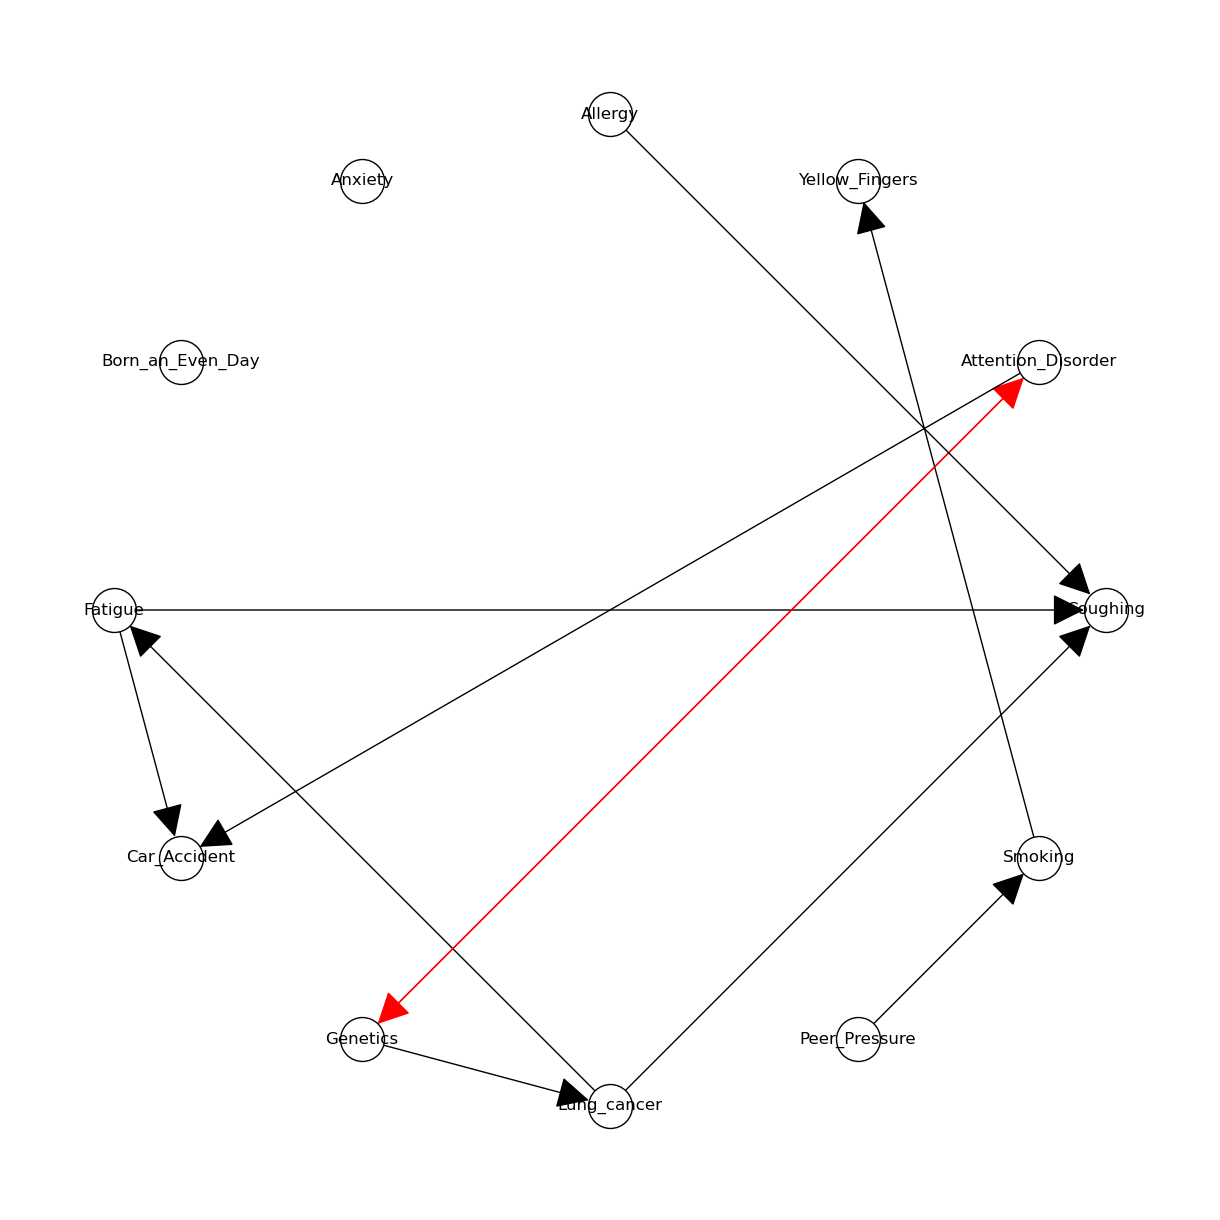

In [27]:
# Visualize the graph
plt.figure(figsize=(12,12))

colors = ['red'  if (y,x) in pc_graph.edges() else 'black' for (x,y) in pc_graph.edges()]
nx.draw_shell(pc_graph, with_labels=True, node_size=1000, font_size=12, arrowsize=50, node_color='w', edgecolors ='black', edge_color=colors)


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Anxiety'] on outcome ['Car_Accident']
INFO:dowhy.utils.plotting:Pygraphviz installation not found, falling back to networkx plotting. For better looking plots, consider installing pygraphviz. Note This requires both the Python pygraphviz package (``pip install pygraphviz``) and the shared system library (e.g. ``brew install graphviz`` or ``apt-get install graphviz``)


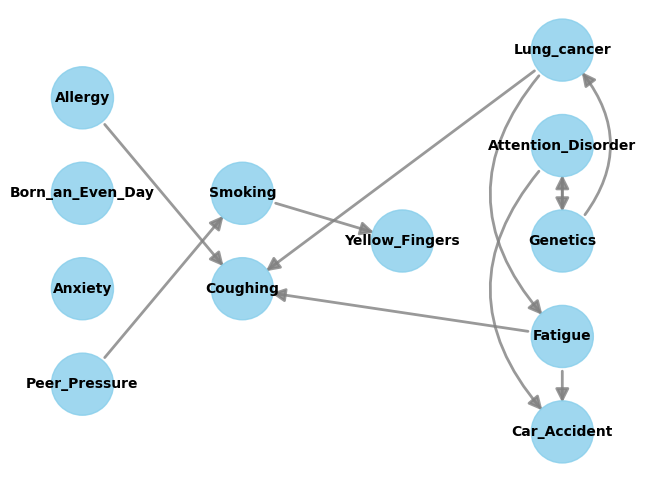

INFO:dowhy.causal_model:linear_regression
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


No directed path from ['Anxiety'] to ['Car_Accident'] in the causal graph.
Causal effect is zero.
Causal Estimate is 0


In [28]:
gml = ''.join(nx.generate_gml(pc_graph))
model = CausalModel(
        data = df,
        treatment='Anxiety',
        outcome='Car_Accident',
        graph=gml)
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

### GES 

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing': 'N', 'Lung_cancer': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing': 'N', 'Lung_cancer': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Smoking': 'N', 'Yellow_Fingers': 'N', 'Anxiety': 'N', 'Peer_Pressure': 'N', 'Genetics': 'N', 'Attention_Disorder': 'N', 'Born_an_Even_Day': 'N', 'Car_Accident': 'N', 'Fatigue': 'N', 'Allergy': 'N', 'Coughing':

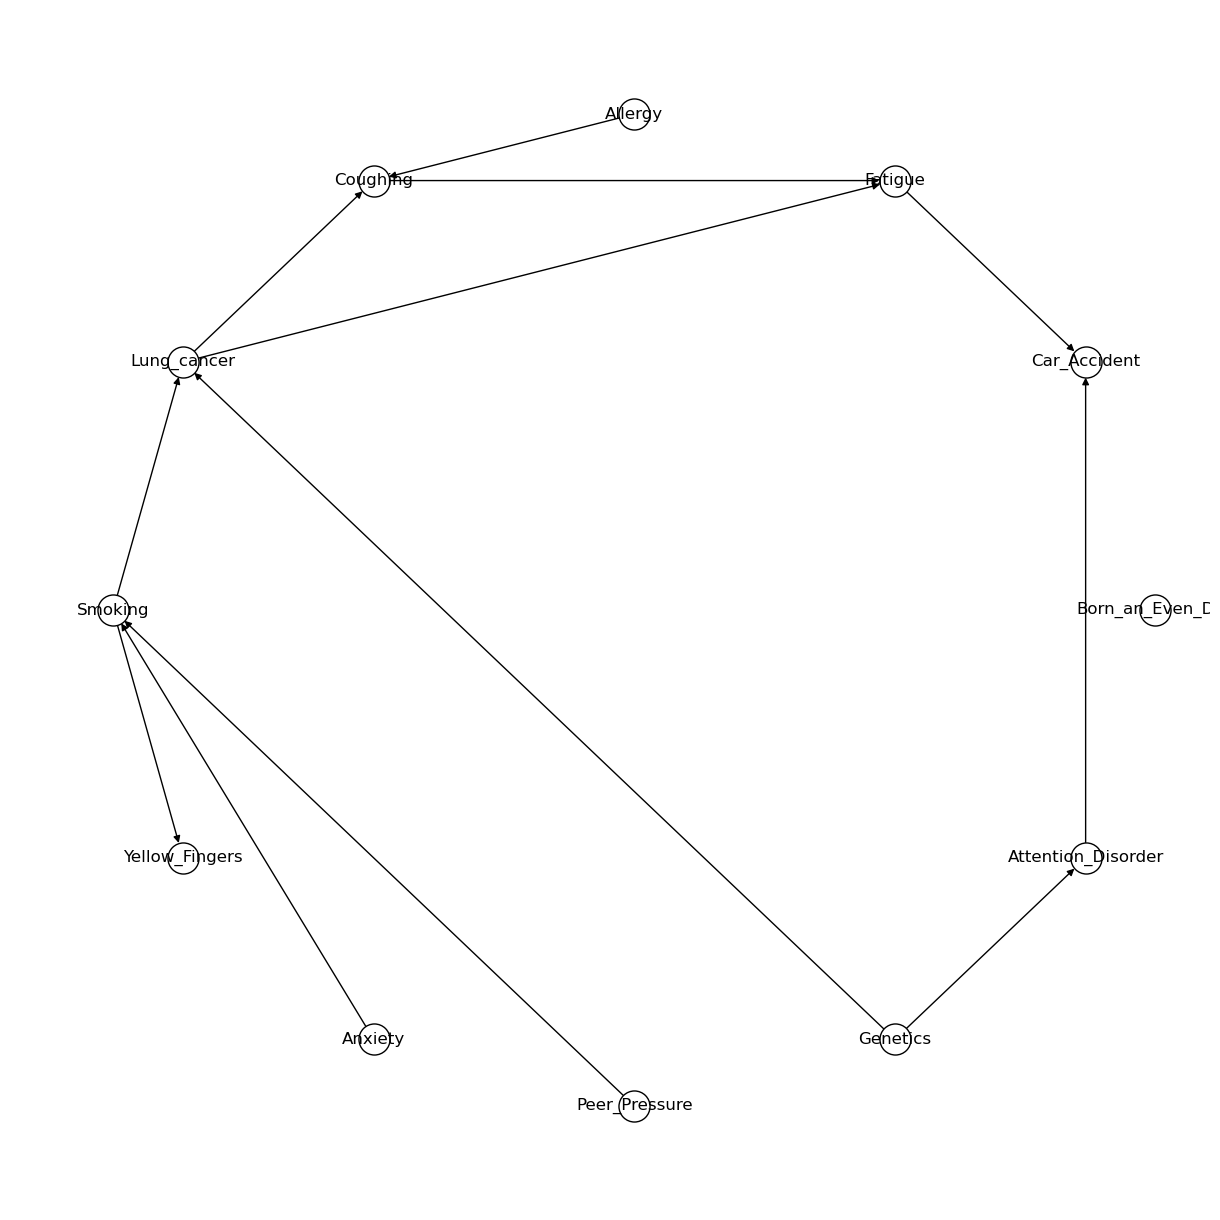

In [29]:
from pgmpy.estimators import GES as pgmpy_ges
from pgmpy.estimators import ExhaustiveSearch, HillClimbSearch, BDeu, BIC


ges_graph_pgmpy = pgmpy_ges(df).estimate(scoring_method='bic-g')
colors = ['red'  if (y,x) in ges_graph_pgmpy.edges() else 'black' for (x,y) in ges_graph_pgmpy.edges()]

plt.figure(figsize=(12,12))
nx.draw_shell(ges_graph_pgmpy, with_labels=True, node_size=500, node_color='w', edgecolors ='black', edge_color=colors)